<a href="https://colab.research.google.com/github/powersurge8891/Machine-Learning-Problems/blob/main/Classifying_cheaters_and_determine_factors_responsible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/7. Random Forest and Driver Importance

/content/drive/MyDrive/Data Mining for Business in Python/7. Random Forest and Driver Importance


In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv('Affairs dataset.csv' ).drop(columns='Unnamed: 0')
dataset.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [4]:
'''
This dataset was gotten from an old research work on extramarital affairs among married people. 
Religiusness refers to how religious the person is. 4 being the highest.

'''

'\nThis dataset was gotten from an old research work on extramarital affairs among married people. \nReligiusness refers to how religious the person is. 4 being the highest.\n\n'

###Transforming data

In [5]:
dataset=pd.get_dummies(dataset, drop_first=True, columns=['occupation'])

In [6]:
dataset.tail()

,affairs,gender,age,yearsmarried,children,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7
596,1,male,22.0,1.5,yes,1,12,5,1,0,0,0,0,0
597,7,female,32.0,10.0,yes,2,18,4,0,0,0,1,0,0
598,2,male,32.0,10.0,yes,2,17,5,0,0,0,0,1,0
599,2,male,22.0,7.0,yes,3,18,2,0,0,0,0,1,0
600,1,female,32.0,15.0,yes,3,14,5,0,0,0,0,0,0


In [7]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [8]:
dataset.affairs.unique()

array([ 0,  3,  7, 12,  1,  2])

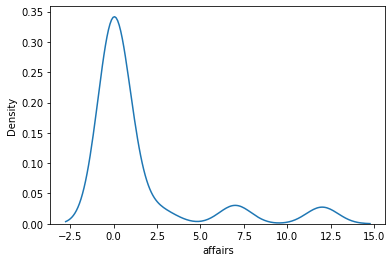

In [9]:
import seaborn as sns
sns.kdeplot(dataset.affairs)

In [10]:
dataset.affairs=pd.cut(x= dataset.affairs, 
                  bins=[-3,0,16],
                  labels=[0,1]       
                  
                  )

In [11]:
dataset.sample(3)

,affairs,age,yearsmarried,religiousness,education,rating,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,gender_male,children_yes
458,1,22.0,1.5,2,14,4,0,1,0,0,0,0,0,0
84,0,22.0,1.5,4,12,5,0,0,0,0,0,0,0,1
281,0,32.0,15.0,4,18,4,0,0,0,0,0,0,0,1


In [12]:
dataset['age']=dataset['age'].astype('int')

In [13]:
dataset['yearsmarried']=dataset['yearsmarried'].astype('int')

In [14]:
dataset.dtypes

affairs          category
age                 int64
yearsmarried        int64
religiousness       int64
education           int64
rating              int64
occupation_2        uint8
occupation_3        uint8
occupation_4        uint8
occupation_5        uint8
occupation_6        uint8
occupation_7        uint8
gender_male         uint8
children_yes        uint8
dtype: object

###splitting and modeling

In [15]:
X= dataset.drop(columns='affairs')
Y=dataset.iloc[:, 1:]

In [16]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test= train_test_split(X, Y, random_state= 5045, test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=5454)

In [18]:
X_train.shape


(480, 13)

In [19]:
Y_train.shape

(480, 13)

In [20]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=5454)

In [26]:
#Determining important drivers
importance=pd.Series(model.feature_importances_, 
          index= X.columns.values)


importance

age              0.138664
yearsmarried     0.127346
religiousness    0.116809
education        0.126421
rating           0.112609
occupation_2     0.006294
occupation_3     0.022211
occupation_4     0.034975
occupation_5     0.078778
occupation_6     0.069918
occupation_7     0.009758
gender_male      0.086872
children_yes     0.069345
dtype: float64

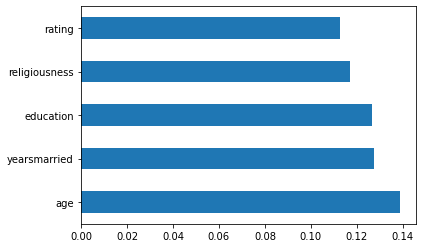

In [31]:
importance.nlargest(5).plot(kind='barh')
#top five drivers of marital infidelity